In [1]:
%load_ext autoreload
%autoreload 2

In [64]:
import sys
sys.path.append('../src/')
import plotutils
import fitbitqueries as fbq

In [3]:
import fitbit
import os
import getpass
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [4]:
os.environ['client_id'] = getpass.getpass('Enter client ID:')
os.environ['client_secret'] = getpass.getpass('Enter client secret:')

Enter client ID:········
Enter client secret:········


In [6]:
#!/Users/hasannagib/opt/anaconda3/envs/fitbit/bin/python ../src/generate_tokens.py $client_id $client_secret

In [29]:
with open('../data/access_token.txt','r') as f:
    os.environ['fitbit_access_token'] = f.read()

with open('../data/refresh_token.txt','r') as f:
    os.environ['fitbit_refresh_token'] = f.read()

## Login to Fitbit

In [30]:
auth_client = fitbit.Fitbit(
    os.environ['client_id'], 
    os.environ['client_secret'],
    os.environ['fitbit_access_token'],
    os.environ['fitbit_refresh_token']
)

## Query sleep data over a date range

Fitbit limits user to 120 API calls per hour. So `.get_sleep()` wouldn't be ideal for getting sleep data over a longer period. Instead we can use the `.time_series()` which is an interface for [this](https://dev.fitbit.com/build/reference/web-api/sleep/#get-sleep-logs-by-date-range) date range API. 

This, however, only allows 100 data points to be extracted at a time. So in order to get more than 100 days worth of sleep data, we would have to split up our date range in chunks that are less than or equal to 100. 

In [66]:
df = fbq.get_sleep_data(auth_client, '2019-01-01', pd.datetime.today())

## `matplotlib`

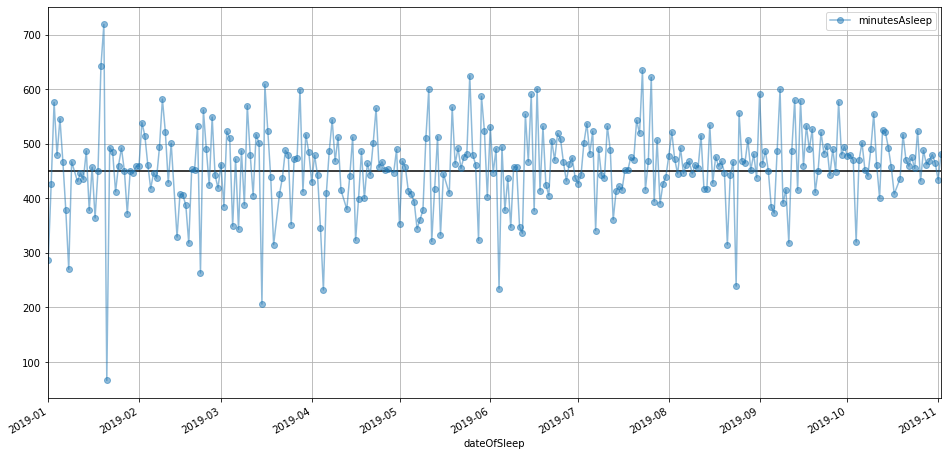

In [67]:
df_plot = df.groupby(pd.Grouper(key='dateOfSleep', freq='d')).sum().query('minutesAsleep > 0')

df_plot['minutesAsleep'].plot(
    figsize=(16,8),
    grid=True,
    style='o-',
    alpha=0.5
);

plt.hlines(450, df_plot.index.min(), df_plot.index.max())
plt.legend();

## `bokeh`

In [68]:
df_plot['Goal'] = 7.5*60
plotutils.plot_ts(
    df_plot, 
    ys=['minutesAsleep', 'Goal'], 
    hover_vars=['timeInBed', 'index'],
    styles=['o-', '-'],
    plot_height=300,
    plot_width=800
)